In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style('white')

In [2]:
# 그래프 부가요소 설정
plt.rcParams['axes.labelsize']=16.
plt.rcParams['xtick.labelsize']=14.
plt.rcParams['ytick.labelsize']=14.
plt.rcParams['legend.fontsize']=12.
plt.rcParams['figure.figsize']=[15.,6.]

In [3]:
# 데이터 불러오기
battles=pd.read_csv('battles.csv')
character_deaths=pd.read_csv('character-deaths.csv')
character_predictions=pd.read_csv("character-predictions.csv")

### 새 칼럼
1. defender_count – 수비측 주요 주택 수
2. attacker_count – 공격측의 주요 주택 수
3. att_comm_count – 공격 측 지휘관 수
4. no_of_books – 캐릭터가 등장한 책 수

In [4]:
battles.loc[:, "defender_count"] = (4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
battles.loc[:, "attacker_count"] = (4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
battles.loc[:, "att_comm_count"] = [len(x) if type(x) == list else np.nan for x in battles.attacker_commander.str.split(",")]
character_predictions.loc[:, "no_of_books"] = character_predictions[[x for x in character_predictions.columns if x.startswith("book")]].sum(axis = 1)

startswith : 대소문자 구분, 인자값에 있는 문자열이 string에 있으면 True, 없으면 False 반환

## 탐색적 분석

### Major death/capture events by year(연도별 주요 사망/포획 횟수)

In [48]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,defender_size,attacker_commander,defender_commander,summer,location,region,note,defender_count,attacker_count,att_comm_count
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,1,1,1.0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,1,1,1.0
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,1,1,2.0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,1,1,5.0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,1,2,2.0


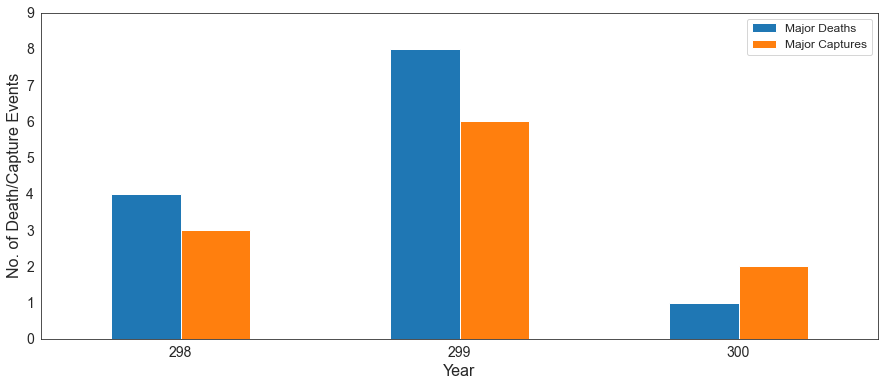

In [6]:
p = battles.groupby('year').sum()[["major_death", "major_capture"]].plot.bar(rot = 0)
_ = p.set(xlabel = "Year", ylabel = "No. of Death/Capture Events", ylim = (0, 9)), p.legend(["Major Deaths", "Major Captures"])

299년에 가장 Major Death, Major Captures가 많았음을 확인할 수 있다.

### Impact of army size on outcome (군대 규모가 결과에 미치는 영향)

- ggplot 기반

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


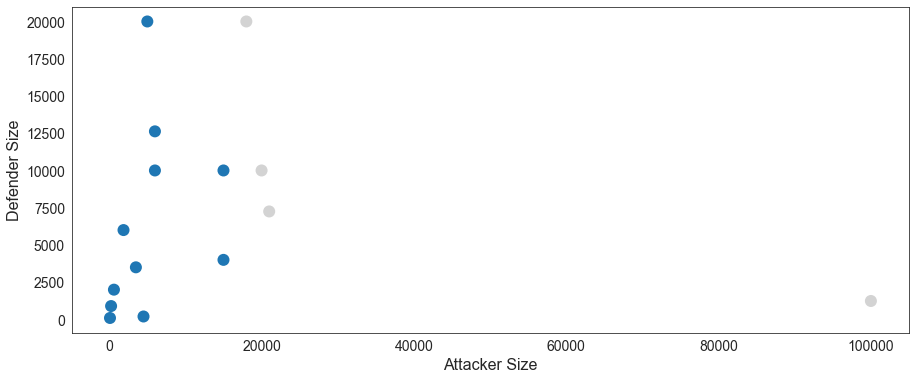

In [7]:
data=battles[["attacker_size", "defender_size", "attacker_outcome"]]
data=data.dropna(axis=0).copy(deep=True)
colors = [sns.color_palette()[0] if x == "win" else "lightgray" for x in data.attacker_outcome.values]
p = data.plot.scatter("attacker_size", "defender_size", c = colors, s = 100, lw = 2.)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size")

In [8]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'lightgray',
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'lightgray',
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'lightgray',
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'lightgray',
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

그래프를 보면, 일정 수 이상의 attacker_size부터 win의 결과가 도출되는 것을 확인할 수 있다.

deep copy : 내부의 객체들까지 모두 새롭게 복사됨

### How often were there more than one major houses on the attacking side?(공격측의 주요 주택이 얼마나 많이 있었는가?)

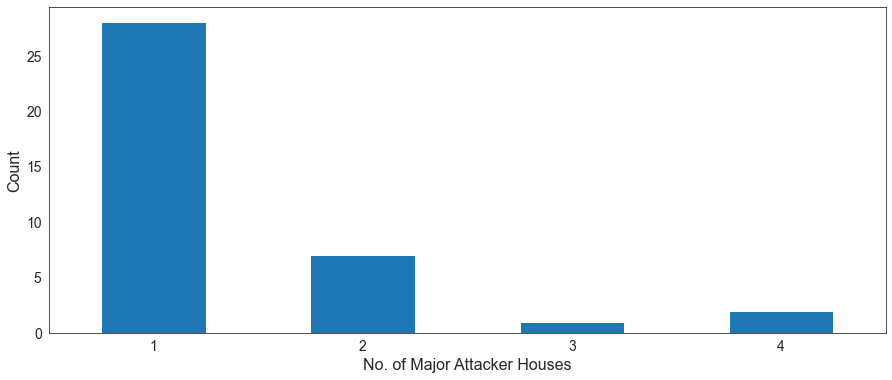

In [9]:
p=battles.attacker_count.value_counts().sort_index().plot.bar(rot=0)
_ = p.set(xlabel= 'No. of Major Attacker Houses',ylabel='Count')

이를 통해 대부분의 공격측에서 1개의 주요주택이 대부분인 것을 확인할 수 있다.

### Which pairs fought the most battles? (어떤 쌍이 가장 많이 싸웠나요?) - 대결구도 횟수

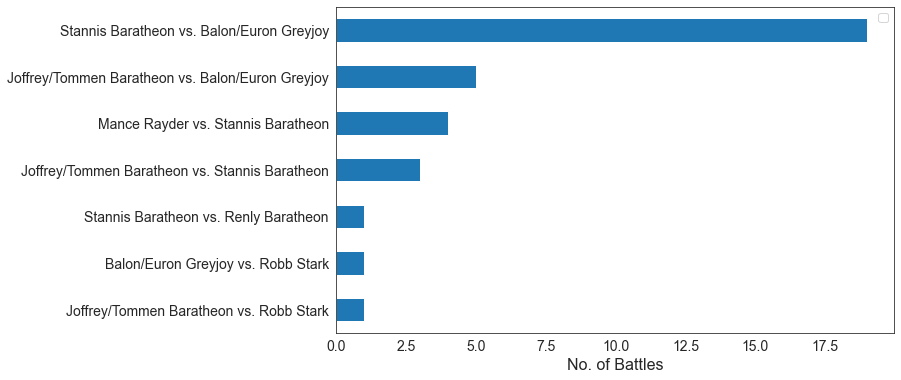

In [10]:
#공격자_king 또는 defender_king이 null인 레코드를 무시합니다. 또한 둘 다 값이 같은 레코드 하나를 무시합니다.
c = list(Counter([tuple(set(x)) for x in battles.dropna(subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
p = pd.DataFrame(c).sort_values(1).plot.barh(figsize = (10, 6))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Battles"), p.legend("")

분석 결과 다음과 같은 구도가 순서대로 많이 나온 것을 확인할 수 있다.

### How many commanders did armies of different kings have? (서로 다른 왕의 군대는 몇 명의 지휘관을 거느렸는가?)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


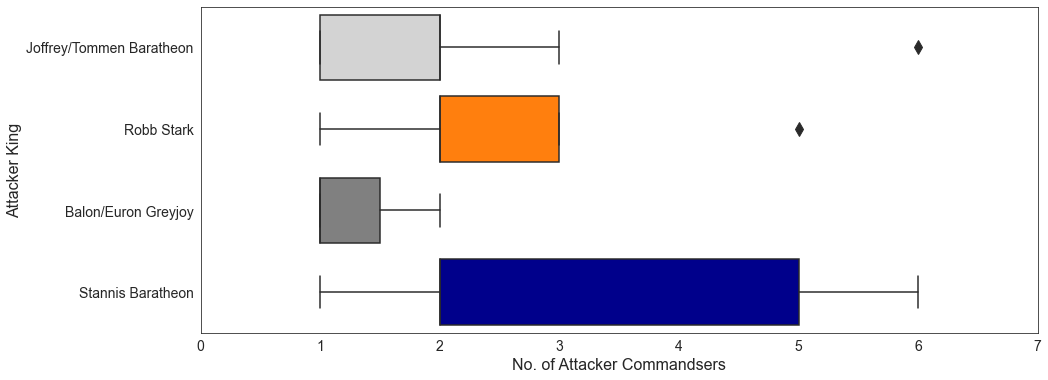

In [11]:
p=sns.boxplot('att_comm_count','attacker_king',data=battles,saturation=6,fliersize=10., palette=['lightgray',sns.color_palette()[1],'grey','darkblue'])
_ = p.set(xlabel='No. of Attacker Commandsers',ylabel='Attacker King',xticks=range(8))

### How many major death/capture events occur in each region? (각 지역에서 얼마나 많은 주요 사망/포획 사건이 발생합니까?)

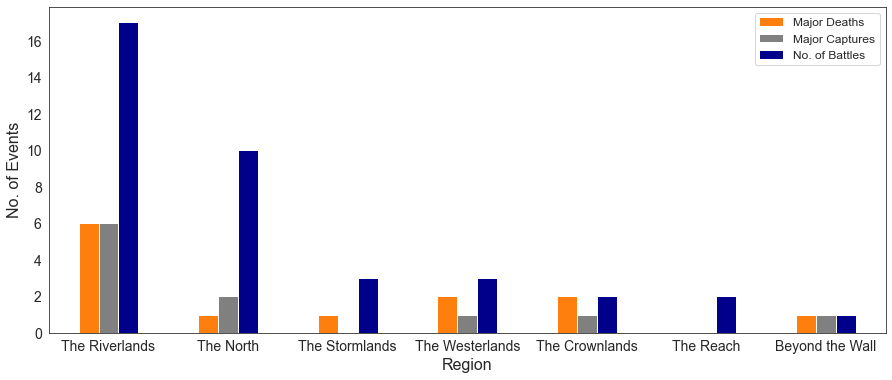

In [12]:
data=battles.groupby('region').sum()[['major_death','major_capture']]
p=pd.concat([data,battles.region.value_counts().to_frame()],
           axis=1).sort_values('region',ascending=False).copy(deep=True).plot.bar(color=[sns.color_palette()[1],'grey','darkblue'],rot=0)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["Major Deaths", "Major Captures", "No. of Battles"], fontsize = 12.)

결과를 확인해보면 Riverlands 지역에서 제일 많이 전투가 일어남에 따라 사상자, 포로가 증가하게 되고, The North, The Stomlands 순으로 이어가고 있다.

### Is there a relationship between survival and having dead relations? (생존과 죽음 사이에는 어떤 관계가 있을까요?)

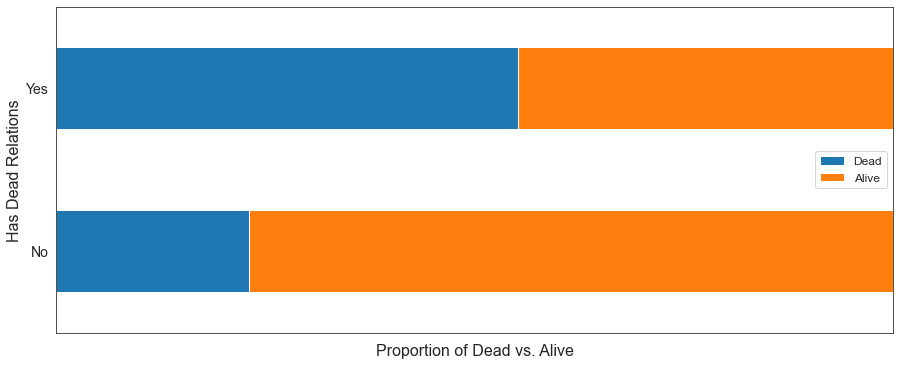

In [13]:
data=character_predictions.groupby(['boolDeadRelations','isAlive']).count()['S.No'].unstack().copy(deep=True)
p=data.div(data.sum(axis=1),axis=0).plot.barh(stacked=True,rot=0,width=.5)
_ = p.set_xlim([0, 1]), p.set(yticklabels = ["No", "Yes"], xticklabels = "", xlabel = "Proportion of Dead vs. Alive", ylabel = "Has Dead Relations"), p.legend(["Dead", "Alive"])

다음과 같은 관계성을 확인할 수 있다. 죽음같은 경우에는 대부분 연관이 있지만, 생존의 경우에는 반대의 결과가 도출된다. 

### 더 많은 책에 등장하는 것이 생존과 어떤 관계가 있는가?

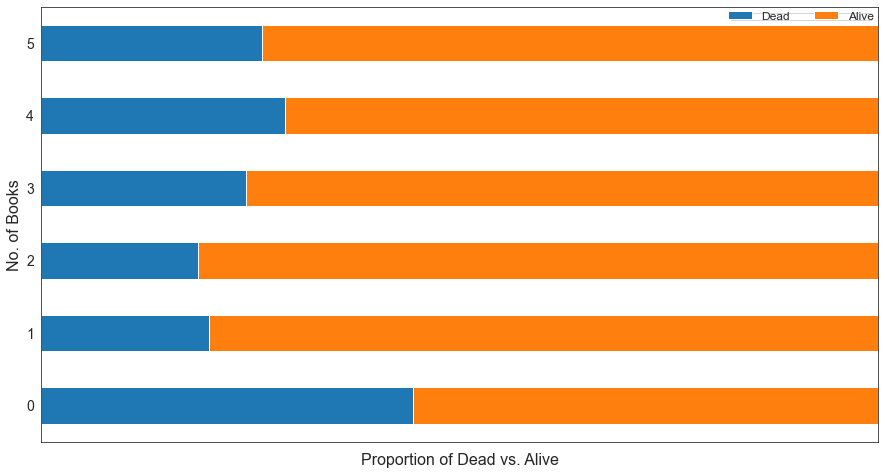

In [14]:
data = character_predictions.groupby(["no_of_books", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 8), width = .5)
_ = p.set(xticklabels = "", xlim = [0, 1], ylabel = "No. of Books", xlabel = "Proportion of Dead vs. Alive"), p.legend(["Dead", "Alive"], loc = "upper right", ncol = 2, borderpad = -.15)

book의 개수에 따른 생존과 죽음의 여부는 특정한 관계를 찾아볼수는 없다. 그렇지만, books가 높을수록 평균적인 생존확률이 상승하는 추세인 것은 확인할 수 있다.

### 문화가 생존과 어떤 관계가 있을까요?

이를 위해, 우리는 도메인 지식을 사용하여 문화 이름을 바꿀 것입니다. 많은 문화적 가치가 단일 문화에 매핑되기 때문입니다.

In [15]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value=value.lower()
    v=[k for (k,v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

unstack : 왼쪽에서 오른쪽으로 데이터프레임 재구조화

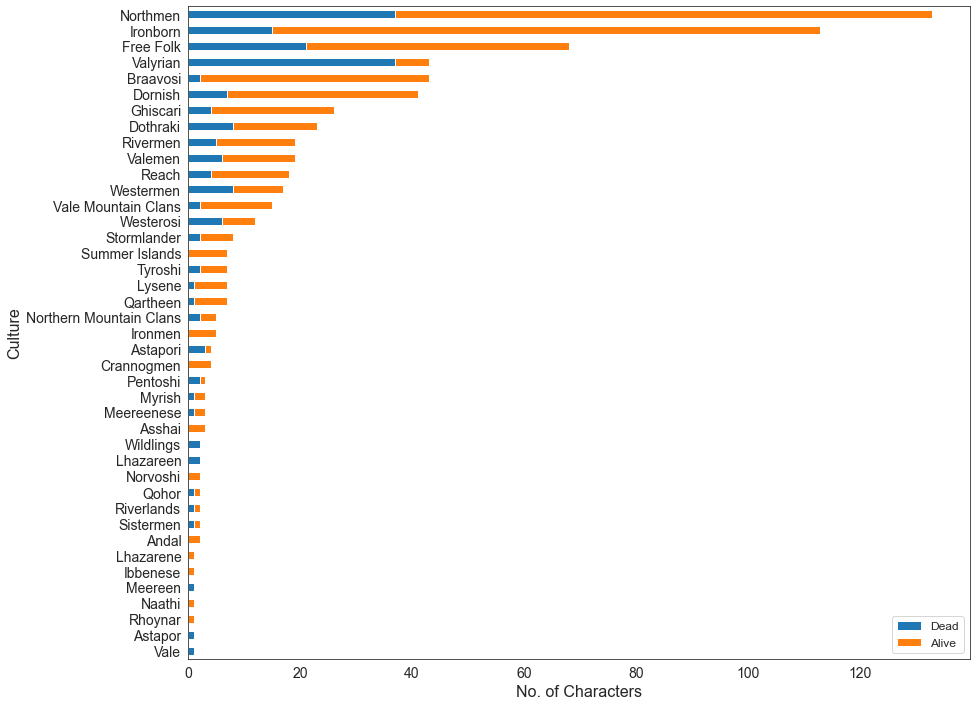

In [16]:
character_predictions.loc[:,'culture']=[get_cult(x) for x in character_predictions.culture.fillna("")]
data=character_predictions.groupby(['culture','isAlive']).count()['S.No'].unstack().copy(deep=True)
data.loc[:,'total']=data.sum(axis=1)
p=data[data.index != ''].sort_values('total')[[0,1]].plot.barh(stacked=True,rot=0,figsize=(14,12),)
_ = p.set(xlabel='No. of Characters',ylabel='Culture'),p.legend(['Dead','Alive'],loc='lower right')

### 대군이 반드시 승리하는가?
보시는 바와 같이 결과는 이상합니다.

그러나 공정하게 말하자면, 나는 오직 attacker_size와 defender_size에 대한 유효한 값을 가진 전투만 고려했는데, 이것은 레코드 수를 37개에서 16개로 줄인다. 저는 아직 GOT 팬도 아니고 TV 시리즈도 본 적이 없습니다.

GoT Wikia에서 NaN attacker_size와의 전투 중 하나를 읽었습니다. Force 섹션에는 다음과 같은 내용이 나와 있습니다.

    리버랜드 소시민 난민들에 의해 습격대가 보고되었지만 철왕좌 분견대는 상당히 큰 병력에 의해 맞닥뜨렸다.

이를 근거로, attacker_size가 더 크다고 가정하면, 더 큰 군대가 이길 가능성이 더 높다는 입장에 유리하게 계산될 것이다. 그러나 남은 20여 차례에 대한 이 자료는 없어 단정적으로 말할 수 없다.


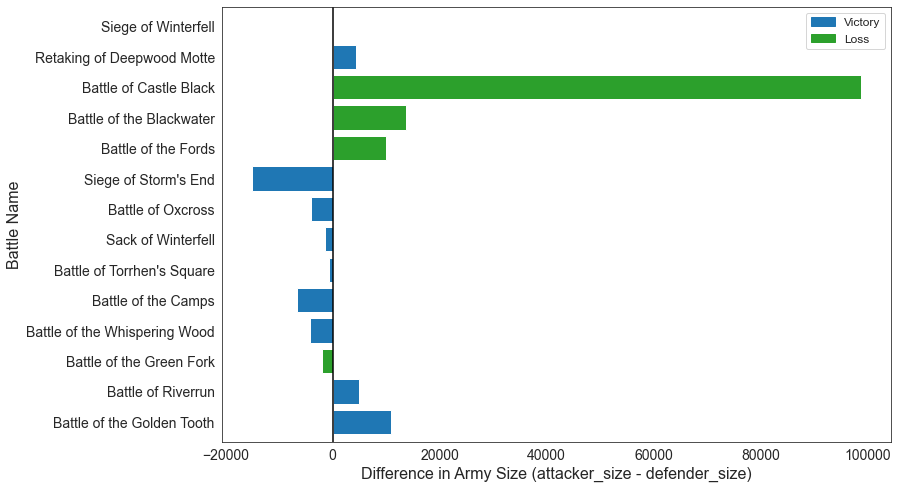

In [17]:
data=battles.dropna(subset=['attacker_size','defender_size']).copy(deep=True)
data=pd.concat([(data.attacker_size - data.defender_size).to_frame(),battles[['attacker_outcome']]],axis=1,join='inner')
data=data[data[0]!=0]
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
_ = p.legend(handles = [mpatches.Patch(color = sns.color_palette()[0], label = "Victory", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = p.axvline(0, color = 'k'), p.set(yticklabels = battles.name.iloc[data.index].values, xlabel = "Difference in Army Size (attacker_size - defender_size)", ylabel = "Battle Name")

### 왕들은 얼마나 자주 다른 종류의 전투를 벌였는가?
이 데이터에는 4가지 유형의 전투가 포함되어 있는데, 이 전투 중 가장 빈번한 전투와 가장 적은 전투이다.

롭 스타크가 가장 좋아하는 공격 유형은 매복인 것으로 드러났습니다. 그의 매복형 전투 다섯 개는 모두 조프리/토멘 바라테온과 맞선다. 롭 스타크 또한 매복의 표적이 되었다. 발론/유론 그레이조이가 두 번, 조프리/토멘 바라테온이 세 번.

발론/유론 그레이조이는 조프리/토멘 바라테온이 수비수로 활약한 반면 공격자로서 적어도 한 번은 각 종류의 전투를 치렀다.

아래 차트를 참조하십시오.

polygon : 다각형 그리기

<ipython-input-18-d8b414097225>:88: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 1)


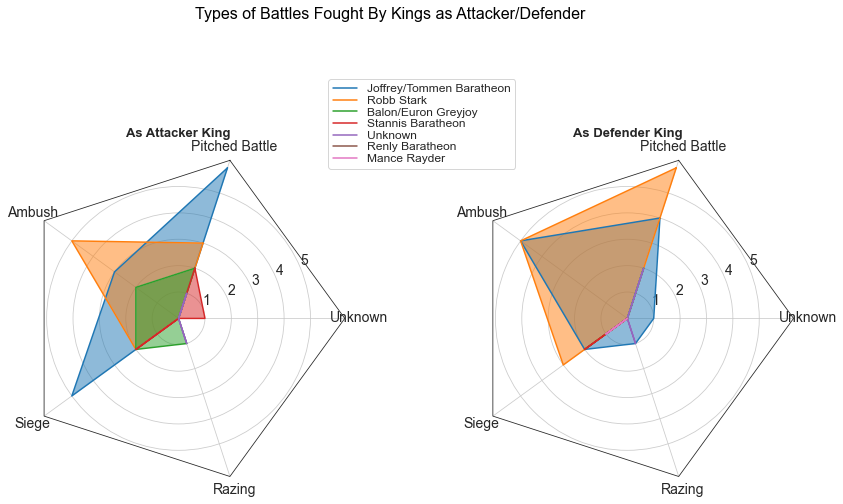

In [18]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

def radar_factory(num_vars, frame = "circle"):
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint = False)
    theta += np.pi / 2.5

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed = True, edgecolor = 'k')

    def draw_circle_patch(self):
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict: raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):
        name, RESOLUTION, draw_patch = 'radar', 1, patch_dict[frame]

        def fill(self, *args, **kwargs):
            closed = kwargs.pop("closed", True)
            return super(RadarAxes, self).fill(closed = closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines: self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == "circle": return PolarAxes._gen_axes_spines(self)
            spine_type, verts = "circle", unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}
    register_projection(RadarAxes)
    return theta

def unit_poly_verts(theta):
    x0, y0, r = [0.5] * 3
    verts = [(r * np.cos(t) + x0, r * np.sin(t) + y0) for t in theta]
    return verts

kings = list(battles.attacker_king.append(battles.defender_king).fillna("Unknown").unique())
battle_types = list(battles.battle_type.fillna("Unknown").str.title().unique())

def example_data():
    data = battles[["battle_type", "attacker_king", "defender_king", "name"]].copy(deep = True).fillna("Unknown")
    data.loc[:, "battle_type"] = data.battle_type.fillna("Unknown").str.title()
    grouped, ret_data = data.groupby(["attacker_king", "battle_type"]).count()[["name"]], [battle_types]
    ret_data.append(("As Attacker King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    grouped = data.groupby(["defender_king", "battle_type"]).count()[["name"]]
    ret_data.append(("As Defender King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    return ret_data

N = 5
theta, data = radar_factory(N, frame = "polygon"), example_data()
spoke_labels, fig = data.pop(0), plt.figure(figsize = (14, 14))
fig.subplots_adjust(wspace = 0.35, hspace = 0.20, top = 0.85, bottom = 0.05)
colors = sns.color_palette() + ["k"]
for n, (title, case_data) in enumerate(data):
    ax, _ = fig.add_subplot(2, 2, n + 1, projection = "radar"), plt.rgrids([1, 2, 3, 4, 5])
    ax.set_title(title, weight = "bold", position = (0.5, 1.1), horizontalalignment = "center", verticalalignment = "center", fontsize = 13.)
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color = color)
        ax.fill(theta, d, facecolor = color, alpha = 0.5)
    ax.set_varlabels(spoke_labels)
plt.subplot(2, 2, 1)
labels = kings
legend = plt.legend(labels, loc = (.95, .95), labelspacing = 0.1)
plt.setp(legend.get_texts(), fontsize = "large")
plt.figtext(0.5, 0.965, "Types of Battles Fought By Kings as Attacker/Defender", ha = "center", color = "k", size = 16.)
plt.show()

In [19]:
death_preds = character_predictions.copy(deep = True)

## 예측 실험

In [20]:
from xgboost import plot_importance
from xgboost import XGBClassifier as XGBC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, confusion_matrix, precision_score, recall_score, classification_report, accuracy_score

### 약간의 전처리
숫자가 아닌 범주형 특징을 숫자로 빠르게 변환한다. 그런 다음 일부 열을 삭제하고 결측값을 -1로 바꿉니다.

pd.factorize : 개체를 열거형 또는 범주형 변수로 인코딩

In [23]:
# 타입이 object인 데이터에 대한 처리
death_preds.loc[:,'culture']=[get_cult(x) for x in death_preds.culture.fillna('')]
death_preds.loc[:,'title']=pd.factorize(death_preds.title)[0]
death_preds.loc[:,'culture']=pd.factorize(death_preds.culture)[0]
death_preds.loc[:, "mother"] = pd.factorize(death_preds.mother)[0]
death_preds.loc[:, "father"] = pd.factorize(death_preds.father)[0]
death_preds.loc[:, "heir"] = pd.factorize(death_preds.heir)[0]
death_preds.loc[:, "house"] = pd.factorize(death_preds.house)[0]
death_preds.loc[:, "spouse"] = pd.factorize(death_preds.spouse)[0]

death_preds.drop(['name','alive','pred','plod','isAlive','dateOfBirth'],1,inplace=True)
death_preds.columns=map(lambda x : x.replace('.','').replace('_',''),death_preds.columns)
death_preds.fillna(value=-1,inplace=True)

### 계급 불균형이 있나요?
이제 학급 분포를 살펴보도록 하겠습니다.

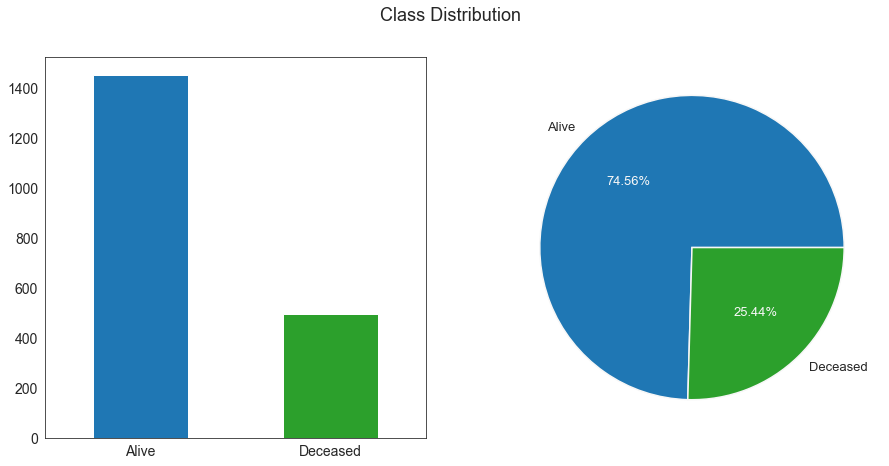

In [24]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Class Distribution", fontsize = 18.)
_ = death_preds.actual.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Alive", "Deceased"])
_ = death_preds.actual.value_counts().plot.pie(labels = ("Alive", "Deceased"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")


클래스 분포가 불균형을 나타냅니다. 죽은 사람보다 살아 있는 사람이 더 많다. 이 문제를 해결하기 위한 몇 가지 잘 알려진 방법이 있다.

가장 간단한 두 가지 방법은 언더샘플링과 오버샘플링이다. 이 경우, 우리는 다수 계층을 과소표현할 것입니다. 소수자 Dead 클래스에서 교체하지 않고 ~70%의 샘플을 추첨하겠습니다. 우리는 대다수의 Alive 클래스에서 동일한 수의 샘플(350개)을 추출할 것입니다.

이 열차 테스트 분할을 사용하여 XGB 분류기 모델과 로지스틱 회귀 모델이라는 두 가지 모델을 구축하고 비교합니다.

In [27]:
# 샘플링을 통한 모델 추출
X=death_preds[death_preds.actual==0].sample(350,random_state=62).append(death_preds[death_preds.actual==1].sample(350,random_state=62)).copy(deep=True).astype(np.float64)
Y=X.actual.values
tX=death_preds[~death_preds.index.isin(X.index)].copy(deep=True).astype(np.float64)
tY=tX.actual.values
X.drop(['SNo','actual','DateoFdeath'],1,inplace=True)
tX.drop(['SNo','actual','DateoFdeath'],1,inplace=True)

### XGB Classifier

[14:53:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


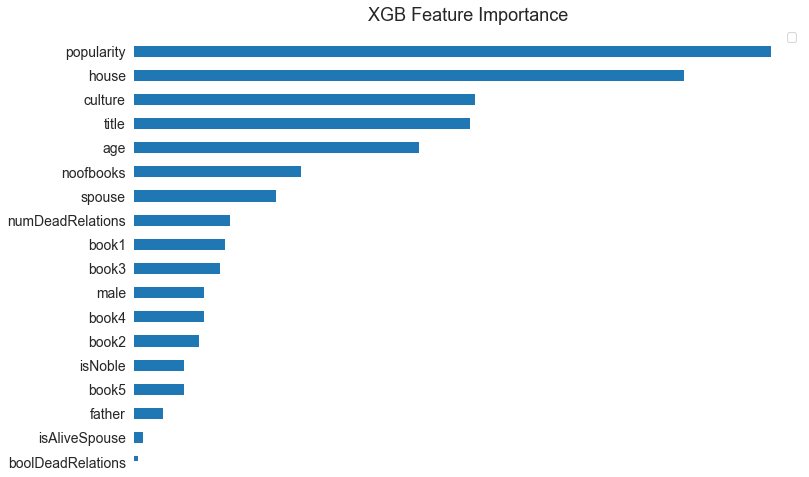

In [31]:
clf_xgb=XGBC(subsample=.8,colsample_bytree=.8,seed=14,max_depth=3).fit(X,Y)
preds_xgb=clf_xgb.predict_proba(tX)
ax=pd.DataFrame(list(clf_xgb.get_booster().get_fscore().items())).set_index(0)\
.sort_values(1).plot.barh(figsize=(12,8))
_=ax.set(frame_on=False,ylim=(0,len(clf_xgb.get_booster().get_fscore())),xticklabels='',xlabel='',ylabel=''),ax.legend('')
_=plt.title('XGB Feature Importance',fontsize=18.)

위의 데이터는 XGBoost Classifiier을 사용했을 때 변수의 중요도를 나타낸 그래프이며 결과는 다음과 같다

### Logistic Regression

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


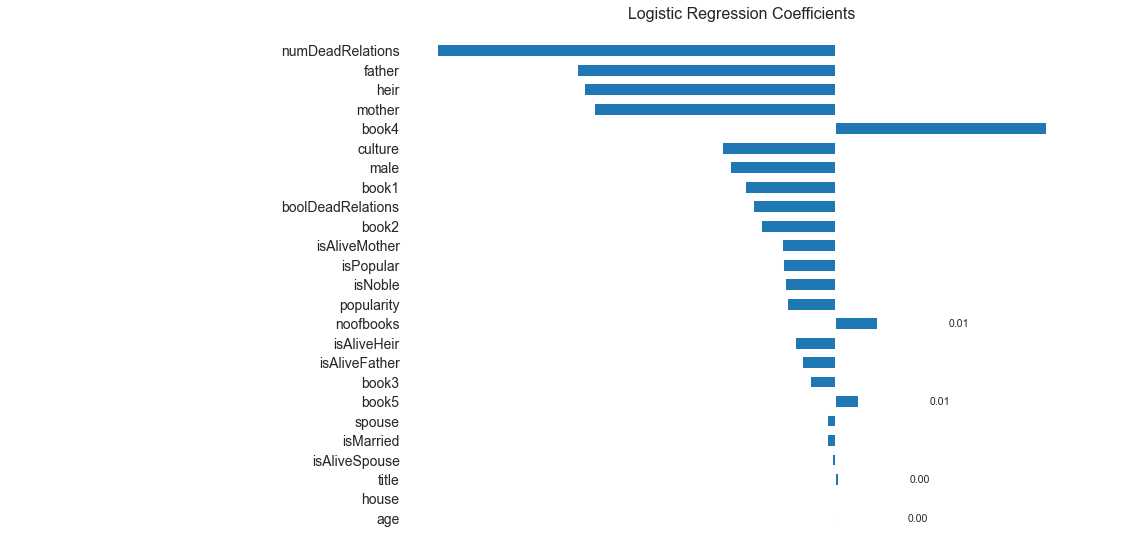

In [35]:
logreg = LogisticRegression(random_state = 14).fit(X, Y)
preds_lr = logreg.predict_proba(tX)

df = pd.DataFrame(list(zip(tX.columns, logreg.coef_[0])))
df = df.reindex(df[1].abs().sort_values().index).set_index(0)
ax = df.plot.barh(width = .6, legend = "", figsize = (12, 9))
ax.set_title("Logistic Regression Coefficients", y = 1.03, fontsize = 16.)
_ = ax.set(frame_on = False, xlabel = "", xticklabels = "", ylabel = "")

for i, label in enumerate(list(df.index)):
    score = df.loc[label][1]
    ax.annotate('%.2f' % score, (score + (-.12 if score < 0 else .02), i - .2), fontsize = 10.5)

### XGB 분류기와 로지스틱 회귀 분석 비교
#### Confusion Matrix
먼저 두 모델의 Confusion Matrix을 볼 수 있습니다. 시각화하기 전에 행 단위 합계를 통해 이를 정규화할 것이다.

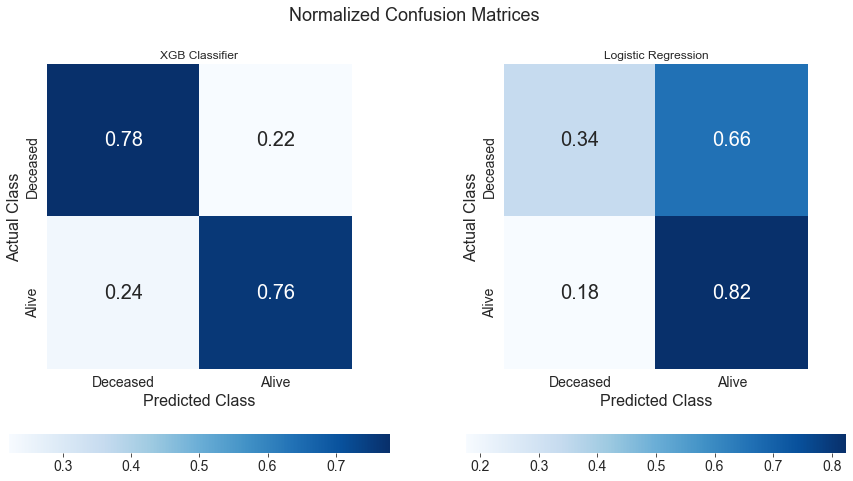

In [39]:
f, ax = plt.subplots(1, 2, figsize = (15, 8))
f.suptitle("Normalized Confusion Matrices", fontsize = 18.)
def make_cm(p, t, axis):
    cm = confusion_matrix(tY, np.argmax(p, axis = 1))
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    _ = sns.heatmap(cm, square = True, xticklabels = ["Deceased", "Alive"], annot = True,
                    annot_kws = {"fontsize": 20}, yticklabels = ["Deceased", "Alive"],
                    cbar = True, cbar_kws = {"orientation": "horizontal"}, ax = ax[axis], cmap = "Blues").set(
        xlabel = "Predicted Class", ylabel = "Actual Class", title = t)
make_cm(preds_xgb, "XGB Classifier", 0)
make_cm(preds_lr, "Logistic Regression", 1)

- annot_kws : 글자 크기 설정
- cbar_kws : 키 딕셔너리 , 값 매핑, 선택 사항에 대한 키워드 인수
- argmax : 최대값의 인덱스 위치

### 스코어카드
다음으로 두 모델의 스코어카드가 표시됩니다. 편리한 classification_report와 sklearn.metrics의 여러 다른 기능을 사용하여 AUC, 로그 손실 및 정확도와 같은 다양한 평가 지표를 살펴본다.

In [41]:
print('XGB Classifier Performance\n'+'='*26+'\n',classification_report(tY,np.argmax(preds_xgb,axis=1),target_names=['Deceased','Alive']))
print("AUC      : %.4f" % roc_auc_score(tY, preds_xgb[:, 1]))
print("Accuracy : %.4f" % accuracy_score(tY, np.argmax(preds_xgb, axis = 1)))
print('Log Loss : %.4f\n\n'%log_loss(tY,preds_xgb[:,1]))
print("Logistic Regression Performance\n" + "=" * 31 + "\n", classification_report(tY, np.argmax(preds_lr, axis = 1), target_names = ["Deceased", "Alive"]))
print("AUC      : %.4f" % roc_auc_score(tY, preds_lr[:, 1]))
print("Accuracy : %.4f" % accuracy_score(tY, np.argmax(preds_lr, axis = 1)))
print("Log Loss : %.4f" % log_loss(tY, preds_lr[:, 1]))

XGB Classifier Performance
               precision    recall  f1-score   support

    Deceased       0.30      0.78      0.43       145
       Alive       0.96      0.76      0.85      1101

    accuracy                           0.76      1246
   macro avg       0.63      0.77      0.64      1246
weighted avg       0.89      0.76      0.80      1246

AUC      : 0.8291
Accuracy : 0.7632
Log Loss : 0.5448


Logistic Regression Performance
               precision    recall  f1-score   support

    Deceased       0.20      0.34      0.25       145
       Alive       0.90      0.82      0.86      1101

    accuracy                           0.77      1246
   macro avg       0.55      0.58      0.56      1246
weighted avg       0.82      0.77      0.79      1246

AUC      : 0.6160
Accuracy : 0.7681
Log Loss : 0.6458


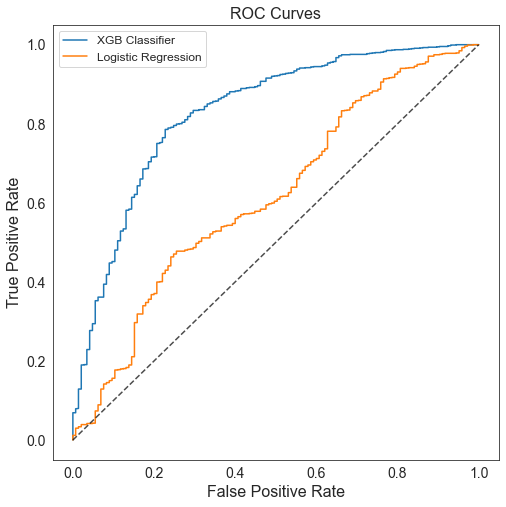

In [43]:
_ = plt.figure(figsize = (8, 8)), plt.plot(*roc_curve(tY, preds_xgb[:, 1])[:2]), plt.plot(*roc_curve(tY, preds_lr[:, 1])[:2], c = sns.color_palette()[1]), plt.legend(["XGB Classifier", "Logistic Regression"], loc = "upper left")
_ = plt.plot((0., 1.), (0., 1.), "--k", alpha = .7), plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate"), plt.title("ROC Curves", fontsize = 16.)

- 결과를 통해 XGB Classifier을 통해 분석한 것이 결과가 더 좋게 나왔다.